In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [161]:
X,y=make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)


In [162]:
df=pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target']=y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.370931,1.857250,-1.457150,0.053865,1.147773,1
1,2.614850,-2.113032,-0.715251,-2.281202,0.328674,0
2,0.311170,1.480612,-1.557574,0.431259,1.968235,1
3,-1.123656,0.591743,-0.262057,-0.124039,1.398786,1
4,-1.376243,1.079442,0.912528,2.252036,1.598728,1


In [163]:
#function fro row sampling
def row_sampling(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [164]:
#function for features sampling
import random


def feature_sampling(df,percent):
    cols=random.sample(df.columns[:-1].tolist(),int(percent*df.shape[1]))
    return df[cols]

In [165]:
#function for combined sampling
def combined_sampling(df,percent):
    new_df=row_sampling(df,percent)
    return feature_sampling(new_df,percent)

In [166]:
df1=row_sampling(df,0.2)
#with replecement
df1.head()

,col1,col2,col3,col4,col5,target
98,-1.595410,0.521780,-0.767086,-2.515889,-1.043803,1
16,1.933791,-1.834291,-1.412503,-1.315219,1.519853,0
0,-0.370931,1.857250,-1.457150,0.053865,1.147773,1
4,-1.376243,1.079442,0.912528,2.252036,1.598728,1
89,-1.936424,1.005334,-1.966513,0.215356,0.827767,0


In [167]:
df2=row_sampling(df,0.2)
df3=row_sampling(df,0.2)
df2.head(),df3.head()

(        col1      col2      col3      col4      col5  target
 39  0.529449 -0.898592 -1.545307  0.100106  1.958851       0
 15 -3.352987  1.220223  0.340240 -0.096116  1.119979       1
 87 -1.028121  0.639649 -0.740664 -1.246527  0.102572       1
 4  -1.376243  1.079442  0.912528  2.252036  1.598728       1
 82 -2.581975  0.111679  0.091294 -1.459360  1.117834       1,
         col1      col2      col3      col4      col5  target
 57  0.931025  2.487610 -3.382767 -1.227890  1.589950       1
 59  2.712566 -2.382319 -1.662996 -3.299523 -0.226767       0
 82 -2.581975  0.111679  0.091294 -1.459360  1.117834       1
 14 -0.721434 -0.400741  0.136609  0.250287  2.306504       1
 82 -2.581975  0.111679  0.091294 -1.459360  1.117834       1)

In [168]:
df1.shape,df2.shape,df3.shape

((20, 6), (20, 6), (20, 6))

In [169]:
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [170]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.875, 'x[1] <= 0.484\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(0.25, 0.625, 'x[3] <= -0.887\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.375, 0.375, 'x[4] <= 0.22\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.625, 'x[2] <= -1.762\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

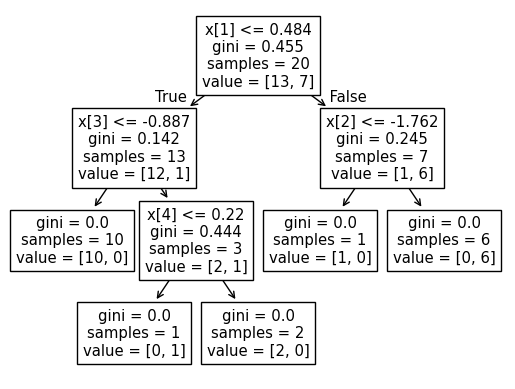

In [171]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.5, 0.75, 'x[1] <= -0.615\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.625, 0.5, '  False')]

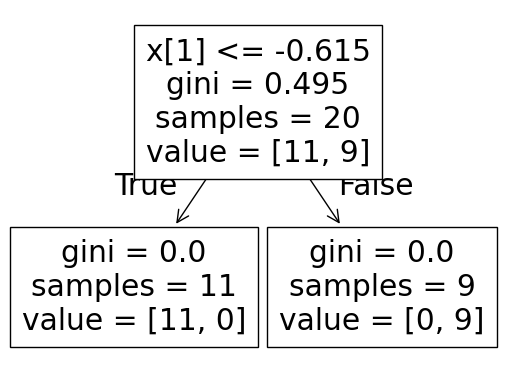

In [172]:
plot_tree(clf2)


[Text(0.6666666666666666, 0.875, 'x[0] <= 1.253\ngini = 0.42\nsamples = 20\nvalue = [6, 14]'),
 Text(0.5, 0.625, 'x[2] <= -1.574\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[2] <= -2.496\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.75, '  False')]

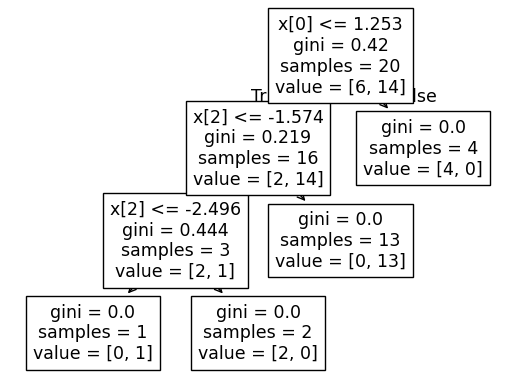

In [173]:
plot_tree(clf3)

In [174]:
clf1.predict(np.array([0.551380,-1.876815,-1.807618,-1.557932,-0.039809]).reshape(1,5))

c:\Users\sande\Desktop\Machine_Learning_Concept\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [175]:
clf1.predict(np.array([0.551380,-1.876815,-1.807618,-1.557932,-0.039809]).reshape(1,5))

c:\Users\sande\Desktop\Machine_Learning_Concept\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [176]:
clf1.predict(np.array([0.551380,-1.876815,-1.807618,-1.557932,-0.039809]).reshape(1,5))

c:\Users\sande\Desktop\Machine_Learning_Concept\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])